In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy


import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced
from config_parser import get_config_file
from src.nqs import RandomHamiltonian

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
visible_size = 4
hidden_size = 12
seed = 42  # Seed for random number generator
gradient_steps = 500
walker_steps = 0
learning_rate = 0.01


In [25]:
np.random.seed(seed)

hamiltonian = RandomHamiltonian(n=visible_size)

In [26]:
rbm_analytic = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=hamiltonian, walker_steps=walker_steps)
rbm_finite = copy.deepcopy(rbm_analytic)

In [27]:
eig,_ = np.linalg.eigh(hamiltonian)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


E_truth: -13.055371981671408


In [28]:
energy_list_analytical = [it for it in rbm_analytic.train(iter=gradient_steps, lr=0.01, analytical_grad=True)]
time_analytic = rbm_analytic.train.run_time
energy_list_finite = [it for it in rbm_finite.train(iter=gradient_steps, lr=0.01, analytical_grad=False)]
time_finite = rbm_finite.train.run_time

Current ground state: -0.9972111695709096 for training step 0
Current ground state: -1.1453067225629319 for training step 1
Current ground state: -1.2817530818526155 for training step 2
Current ground state: -1.431964823701457 for training step 3
Current ground state: -1.612850011646255 for training step 4
Current ground state: -1.845262424676858 for training step 5
Current ground state: -2.1595250471677905 for training step 6
Current ground state: -2.5856380383144564 for training step 7
Current ground state: -3.112452285342978 for training step 8
Current ground state: -3.6127266721225024 for training step 9
Current ground state: -3.898577354558965 for training step 10
Current ground state: -4.0458967109699495 for training step 11
Current ground state: -4.272112664154385 for training step 12
Current ground state: -4.62374726773757 for training step 13
Current ground state: -5.057040003455111 for training step 14
Current ground state: -5.518046132121027 for training step 15
Current grou

Current ground state: -12.81237535066498 for training step 255
Current ground state: -12.787483714775988 for training step 256
Current ground state: -12.770969174668107 for training step 257
Current ground state: -12.798096350678211 for training step 258
Current ground state: -12.805675655079416 for training step 259
Current ground state: -12.809888525015179 for training step 260
Current ground state: -12.827307905334477 for training step 261
Current ground state: -12.812046704133097 for training step 262
Current ground state: -12.821719651442207 for training step 263
Current ground state: -12.839028724994787 for training step 264
Current ground state: -12.818135871485447 for training step 265
Current ground state: -12.835237214817681 for training step 266
Current ground state: -12.842974547997343 for training step 267
Current ground state: -12.826424750025947 for training step 268
Current ground state: -12.844574579374267 for training step 269
Current ground state: -12.844296461187916

Current ground state: -0.9972111694089862 for training step 0
Current ground state: -1.1453268008466155 for training step 1
Current ground state: -1.2818329792941199 for training step 2
Current ground state: -1.4320852330184288 for training step 3
Current ground state: -1.6129458183427174 for training step 4
Current ground state: -1.8452418947867066 for training step 5
Current ground state: -2.159279558385096 for training step 6
Current ground state: -2.5850538850309976 for training step 7
Current ground state: -3.111496078220601 for training step 8
Current ground state: -3.611748283401575 for training step 9
Current ground state: -3.8983170511456984 for training step 10
Current ground state: -4.0463716586040475 for training step 11
Current ground state: -4.273076178248846 for training step 12
Current ground state: -4.6251823435115496 for training step 13
Current ground state: -5.058984524331912 for training step 14
Current ground state: -5.520330937211707 for training step 15
Current 

Current ground state: -12.537841386784635 for training step 135
Current ground state: -12.541370558203324 for training step 136
Current ground state: -12.544864470545303 for training step 137
Current ground state: -12.548294435474226 for training step 138
Current ground state: -12.551664134015654 for training step 139
Current ground state: -12.554997427271974 for training step 140
Current ground state: -12.558289501798313 for training step 141
Current ground state: -12.561515084093166 for training step 142
Current ground state: -12.564672047821137 for training step 143
Current ground state: -12.567767343890274 for training step 144
Current ground state: -12.570790177867718 for training step 145
Current ground state: -12.5737422068811 for training step 146
Current ground state: -12.576644560260274 for training step 147
Current ground state: -12.579499830986057 for training step 148
Current ground state: -12.58229117165926 for training step 149
Current ground state: -12.585016709572322 f

Current ground state: -12.824583417316395 for training step 266
Current ground state: -12.826082400308225 for training step 267
Current ground state: -12.827537744748051 for training step 268
Current ground state: -12.828952572944957 for training step 269
Current ground state: -12.830330170571067 for training step 270
Current ground state: -12.831673923691 for training step 271
Current ground state: -12.832987247081704 for training step 272
Current ground state: -12.834273511623486 for training step 273
Current ground state: -12.835535988025937 for training step 274
Current ground state: -12.836777809120107 for training step 275
Current ground state: -12.83800193722282 for training step 276
Current ground state: -12.839211129783543 for training step 277
Current ground state: -12.84040791201946 for training step 278
Current ground state: -12.84159456531524 for training step 279
Current ground state: -12.842773127967236 for training step 280
Current ground state: -12.843945400329241 for 

Current ground state: -12.987496121043847 for training step 401
Current ground state: -12.988490042144557 for training step 402
Current ground state: -12.989475684052636 for training step 403
Current ground state: -12.990452974409035 for training step 404
Current ground state: -12.991421843959305 for training step 405
Current ground state: -12.992382226575657 for training step 406
Current ground state: -12.993334059282027 for training step 407
Current ground state: -12.994277282283873 for training step 408
Current ground state: -12.995211838996767 for training step 409
Current ground state: -12.996137676067029 for training step 410
Current ground state: -12.997054743382824 for training step 411
Current ground state: -12.997962994078968 for training step 412
Current ground state: -12.998862384539436 for training step 413
Current ground state: -12.99975287439971 for training step 414
Current ground state: -13.000634426548803 for training step 415
Current ground state: -13.0015070071298 f

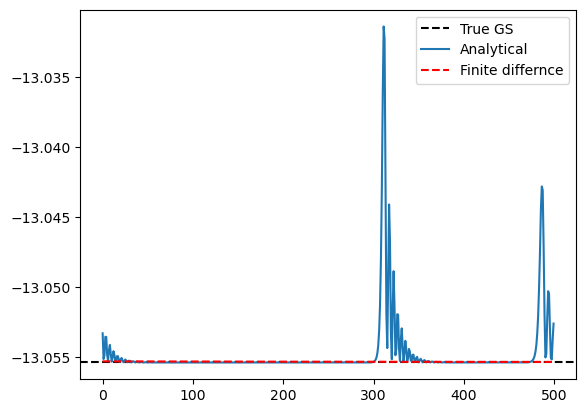

In [23]:
plt.axhline(y=I_truth, color='k', linestyle='--')
plt.plot(energy_list_analytical)
plt.plot(energy_list_finite, 'r--')

plt.legend(['True GS', 'Analytical', 'Finite differnce'])

plt.show()

In [29]:
print(f"Time to run analytical: {time_analytic}")
print(f"Time to run finite: {time_finite}")


Time to run analytical: 0.41712141036987305
Time to run finite: 16.41065287590027
